In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch
from sklearn.preprocessing import maxabs_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


2024-11-13 15:37:38.653042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-13 15:37:38.740452: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 15:37:38.761183: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 15:37:39.149774: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
X, y = make_blobs(n_samples=800, centers=4, n_features=10, random_state=42)
X = maxabs_scale(X)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.
y = y.astype('int')
X, _, y, _ = train_test_split(X, y, train_size=2000, test_size=2000, random_state=420)
clf = LogisticRegression()
clf.fit(X, y)

/home/yuwang/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/home/yuwang/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

device:  cuda:0
Epoch 1/150, Loss: 0.11950284
Epoch 2/150, Loss: 0.06948054
Epoch 3/150, Loss: 0.06428006
Epoch 4/150, Loss: 0.06169113
Epoch 5/150, Loss: 0.05901405
Epoch 6/150, Loss: 0.05571951
Epoch 7/150, Loss: 0.05327284
Epoch 8/150, Loss: 0.05138737
Epoch 9/150, Loss: 0.04953389
Epoch 10/150, Loss: 0.04793015
Epoch 11/150, Loss: 0.04671021
Epoch 12/150, Loss: 0.04576033
Epoch 13/150, Loss: 0.04497431
Epoch 14/150, Loss: 0.04428492
Epoch 15/150, Loss: 0.04366102
Epoch 16/150, Loss: 0.04308430
Epoch 17/150, Loss: 0.04258023
Epoch 18/150, Loss: 0.04213214
Epoch 19/150, Loss: 0.04157377
Epoch 20/150, Loss: 0.04109982
Epoch 21/150, Loss: 0.04075952
Epoch 22/150, Loss: 0.04046518
Epoch 23/150, Loss: 0.04015509
Epoch 24/150, Loss: 0.03987354
Epoch 25/150, Loss: 0.03963349
Epoch 26/150, Loss: 0.03942535
Epoch 27/150, Loss: 0.03920009
Epoch 28/150, Loss: 0.03900473
Epoch 29/150, Loss: 0.03882103
Epoch 30/150, Loss: 0.03865275
Epoch 31/150, Loss: 0.03847195
Epoch 32/150, Loss: 0.03831278
E

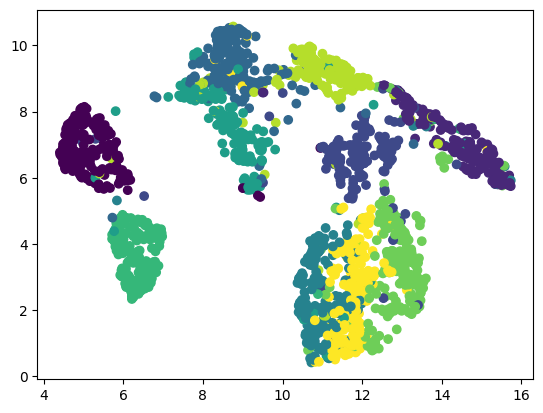

In [3]:
P = UMAP(n_components=2)

# X2D = TSNE(n_components=2).fit_transform(X)
X2D = P.fit_transform(X)
plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# Pinv = NNinv_torch()
# Pinv = RBFinv()
# Pinv = Pinv_ilamp()
Pinv.fit(X2D, X)



In [4]:
builder = MapBuilder(Pinv, None, X2d=X2D, X=X, y=y, scaling=0.9, P=P)

n_classes: 10
150


Loss: 1.5203: 100%|██████████| 150/150 [00:02<00:00, 70.76it/s]


relace the label with the gradient
relace the label with the dist_map


/home/yuwang/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


FileNotFoundError: [Errno 2] No such file or directory: 'figures/dummy.png'

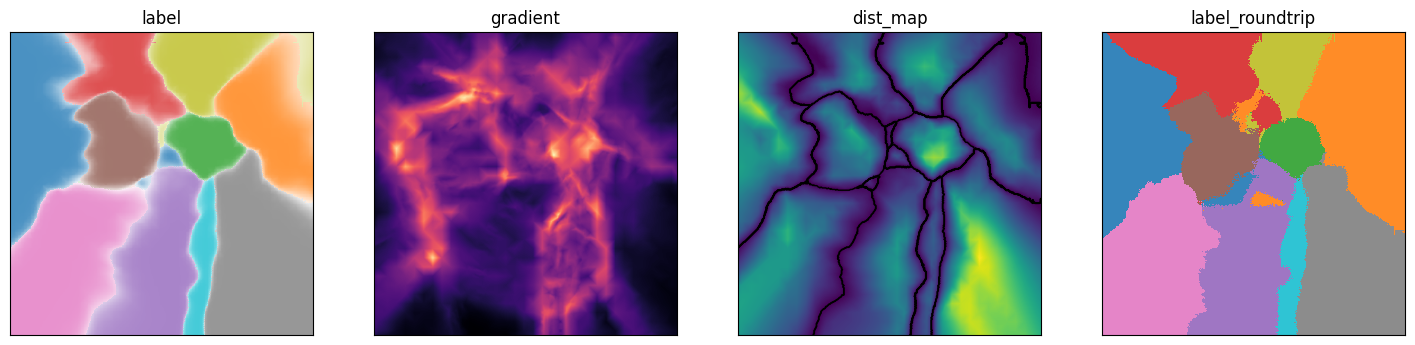

In [5]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=400)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

fig.savefig('figures/dummy.png', dpi=300)

In [6]:
fig.savefig('figures/dummy.png', dpi=300)

relace the label with the gradient
relace the label with the dist_map


/home/yuwang/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


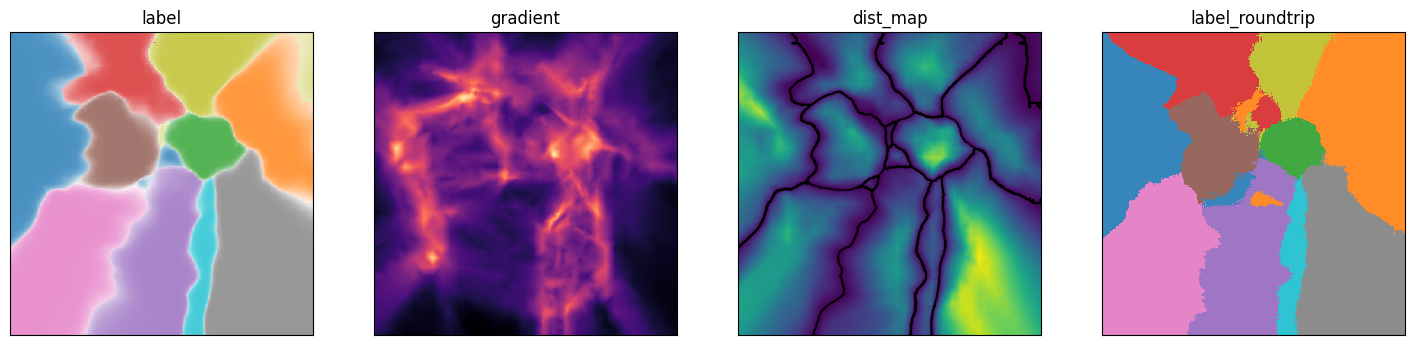

In [7]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=400)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

fig.savefig('figures/fast.png', dpi=300)

relace the label with the gradient


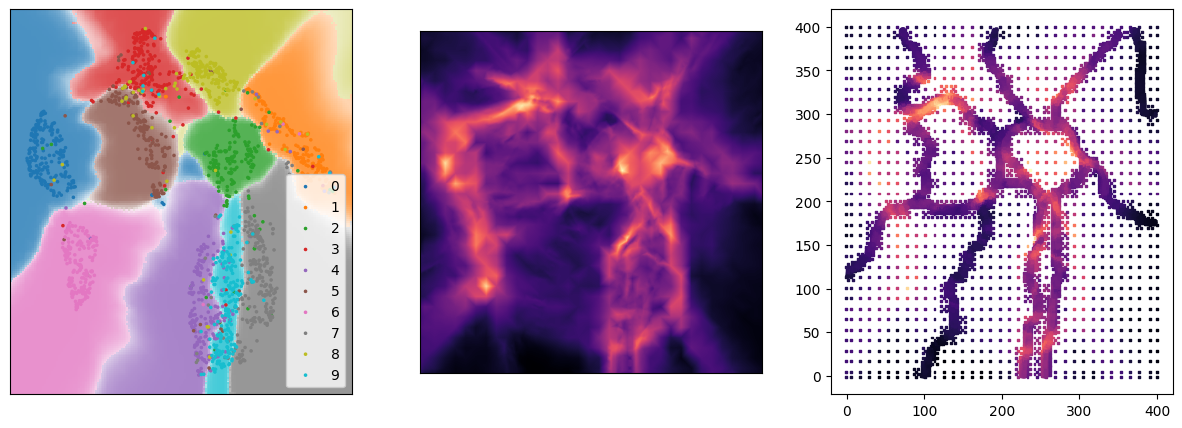

In [8]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=400)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

fig.savefig('figures/spares.png', dpi=300)
